In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./DATA/preprocessing_1999_2022.csv')
data.head()

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases (A00...,15-19,High School Incomplete,500 - 999,28 - 364,13.0,1607,8.12,2003
1,Certain infectious and parasitic diseases (A00...,15-19,High School Graduate,500 - 999,28 - 364,12.0,995,12.09,2003
2,Certain infectious and parasitic diseases (A00...,20-24,High School Graduate,500 - 999,28 - 364,14.0,2456,5.74,2003
3,Certain infectious and parasitic diseases (A00...,20-24,High School Graduate,2500 - 2999,28 - 364,10.0,31463,0.12,2003
4,Certain infectious and parasitic diseases (A00...,20-24,Some College Education,500 - 999,28 - 364,16.0,1222,13.17,2003


In [ ]:
data.dtypes

,0
Cause of death,object
Age of mother,object
Mother's education,object
Birth weight,object
Age of infant at death,object
Deaths,float64
Births,float64
Death rate per 1000,float64
Year,int64


In [ ]:
data.describe()

,Deaths,Births,Death rate per 1000,Year
count,22666.000000,22666.000000,22666.000000,22666.000000
mean,22.886350,8137.656126,60.699380,2009.619254
std,14.232628,12448.642712,78.475845,7.293059
min,10.000000,19.000000,0.060000,1999.000000
25%,12.000000,287.500000,1.310000,2003.000000
50%,17.000000,1022.000000,20.210000,2010.000000
75%,29.000000,12929.000000,94.017500,2016.000000
max,54.500000,31891.250000,233.078750,2022.000000


In [ ]:
data.columns

Index(['Cause of death', 'Age of mother', 'Mother's education', 'Birth weight',
       'Age of infant at death', 'Deaths', 'Births', 'Death rate per 1000',
       'Year'],
      dtype='object')

# Câu hỏi: Các tác nhân gây ra tử vong có tỉ lệ như thế nào?

Lợi ích của việc trả lời câu hỏi: tìm ra được các tác nhân có tỉ lệ tử vong cao từ đó tìm các phương pháp để hạn chế bệnh.

Trả lời câu hỏi bằng cách: 

* Tìm tỉ lệ tử vong trung bình của từng nguyên nhân gây ra tử vong ở trẻ sơ sinh 

* Vẽ biểu đồ tỉ lệ tử vong của các nguyên nhân

* Có thể tìm top 5 nguyên nhân có tỉ lệ tử vong cao nhất và vẽ biển đồ so sánh. 

In [ ]:
groupby_data_cause_deathrate = data.groupby('Cause of death')['Death rate per 1000'].mean()
groupby_data_cause_deathrate = groupby_data_cause_deathrate.reset_index()
groupby_data_cause_deathrate

,Cause of death,Death rate per 1000
0,Accidental suffocation,0.411114
1,Accidents,0.538040
2,Affected by maternal complications of pregnancy,69.855402
3,Affected by maternal factors and by complicati...,91.761491
4,Assault,0.167850
5,Atelectasis,7.698421
6,Bacterial sepsis of newborn,11.887389
7,Birth trauma,8.327143
8,Cerebrovascular diseases,7.840000
9,Certain conditions originating in the perinata...,102.409146


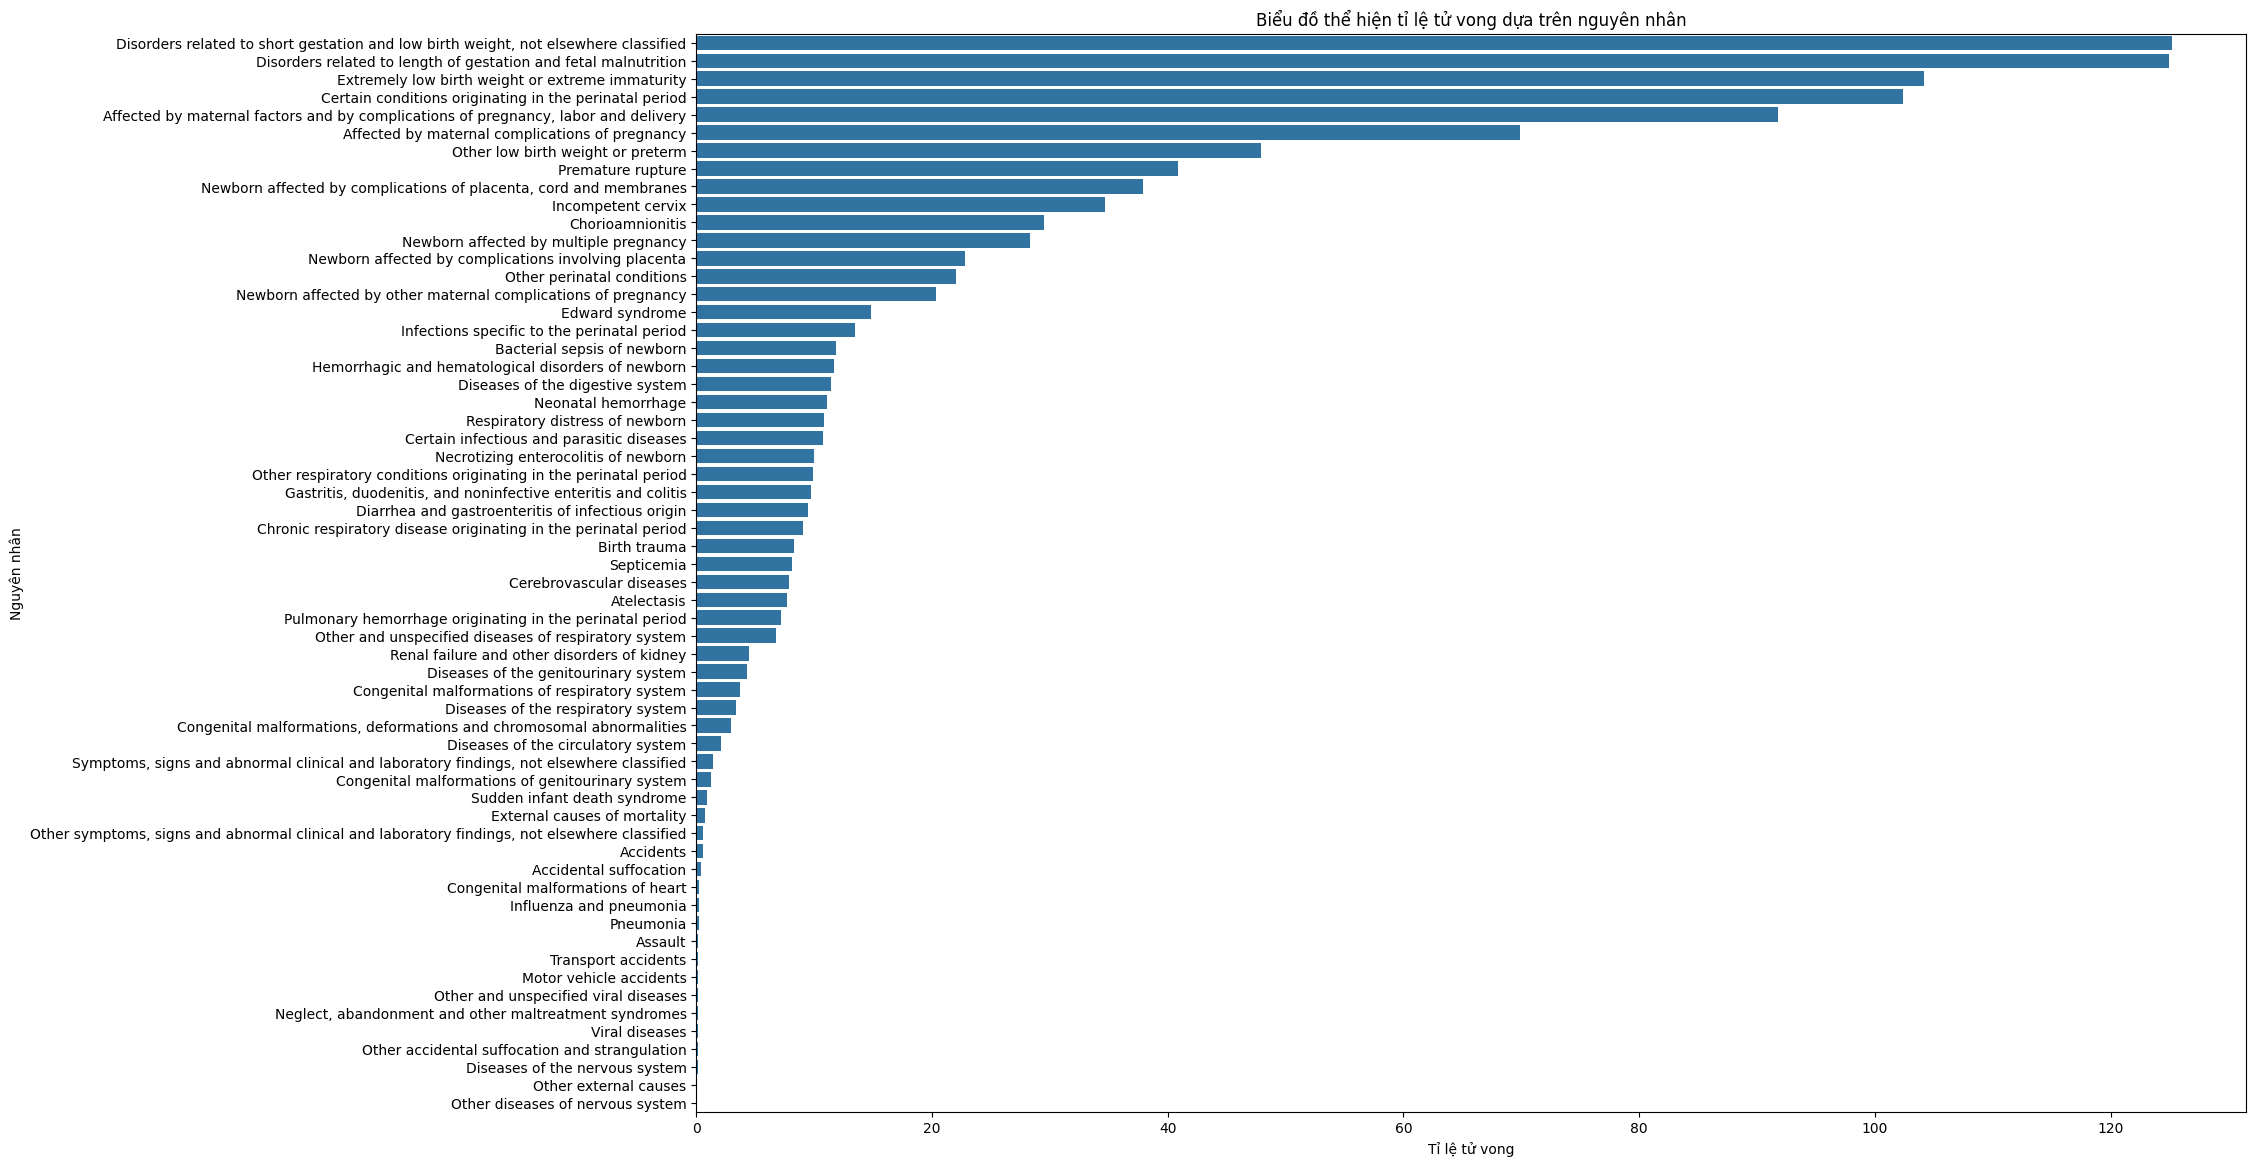

In [ ]:
plt.figure(figsize=(20, 14))
sns.barplot(
    y=groupby_data_cause_deathrate['Cause of death'],
    x=groupby_data_cause_deathrate['Death rate per 1000'],
    order=groupby_data_cause_deathrate.sort_values('Death rate per 1000', ascending=False)['Cause of death']

)

#Cài đặt tiêu đề và nhãn
plt.title("Biểu đồ thể hiện tỉ lệ tử vong dựa trên nguyên nhân")
plt.xlabel("Tỉ lệ tử vong")
plt.ylabel("Nguyên nhân")

#Hiển thị biểu đồ
plt.show()

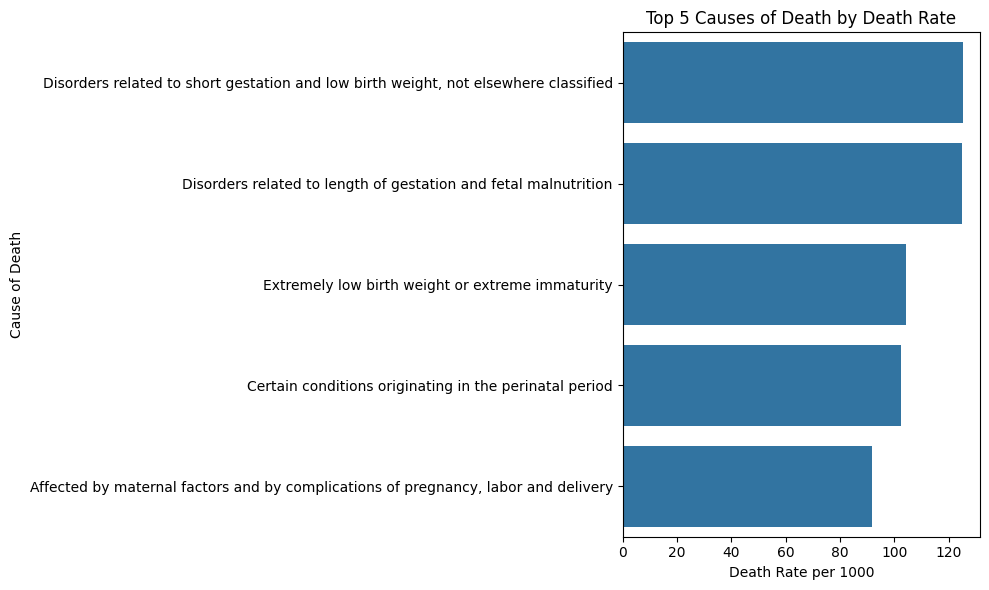

In [ ]:
groupby_data_cause_deathrate = data.groupby('Cause of death')['Death rate per 1000'].mean()
groupby_data_cause_deathrate = groupby_data_cause_deathrate.reset_index()

top_5_causes = groupby_data_cause_deathrate.sort_values(by='Death rate per 1000', ascending=False).head(5)
bot_5_causes = groupby_data_cause_deathrate.sort_values(by='Death rate per 1000', ascending=True).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(y='Cause of death', x='Death rate per 1000', data=top_5_causes)
plt.title('Top 5 Causes of Death by Death Rate')
plt.ylabel('Cause of Death')
plt.xlabel('Death Rate per 1000')
plt.tight_layout()
plt.show()

**5 nguyên nhân có tỉ lệ tử vong cao nhất là:**

In [ ]:
top_5_causes['Cause of death'].to_list()

['Disorders related to short gestation and low birth weight, not elsewhere classified',
 'Disorders related to length of gestation and fetal malnutrition',
 'Extremely low birth weight or extreme immaturity',
 'Certain conditions originating in the perinatal period',
 'Affected by maternal factors and by complications of pregnancy, labor and delivery']

**Disorders related to short gestation and low birth weight, not elsewhere classified (Sinh non, cân nặng khi sinh thấp)**: tỉ lệ tử vong của nhóm này ở mức 125,24 phần nghìn. Tỉ lệ tử vong của nhóm này cao nhất trong các nguyên nhân tử vong có thể hiểu được vì do khi sinh non hoặc không đạt đủ số ký tiêu chuẩn thì các chức năng của cơ thể trẻ chưa được phát triển đầy đủ dẫn đến nguy cơ tử vong cao hơn. \\
**Disorders related to length of gestation and fetal malnutrition(Rối loạn về thời gian mang thai và suy dinh dưỡng ở thai nhi):** tỉ lệ tử vong của nhóm này ở mức 124,94 phần nghìn. Tỉ lệ tử vong của nhóm này cao thứ hai nhưng có thể thấy nó gần sấp sỉ vưới mức cao nhất. Khi thai nhi bị suy dinh dưỡng thì khả năng các cơ quan trong cơ thể không được phát triển một cách tốt nhất do đó không thể đảm bảo sự sống cho trẻ sơ sinh. \\
**Extremely low birth weight or extreme immaturity (Cân nặng khi sinh cực kỳ thấp):** tỉ lệ tử vong của nguyên nhân này ở mức 104,17 phần nghìn. Cũng tương tự như các nguyên nhân trên trẻ sơ sinh sẽ có điều kiện sống thấp hơn khi chưa được phát triển đầy đủ. \\
**Certain conditions originating in the perinatal period (Các bệnh lý trong thời kỳ mang thai):** tỉ lệ tử vong của nguyên nhân này ở khoảng 102,41 phần nghìn. Ở nguyên nhân này, trẻ sơ sinh đã mắc các chứng bệnh khi còn trong thai kỳ. Với ảnh hưởng của bệnh lý thì trẻ sẽ bị yếu hơn, ảnh hưởng đến khả năng sống khi sinh ra. \\
**Affected by maternal factors and by complications of pregnancy, labor and delivery (Bị ảnh hưởng từ bênh của mẹ, biến chứng trong thai kỳ):** tỉ lệ tử vong của nguyên nhân này ở khoảng 91,76 phần nghìn. Cũng là một nguyên nhân liên quan đến bệnh trong thai kỳ nhưng nguyên nhân này bắt nguồn từ mẹ. Khi mẹ bị bệnh có thể lây truyền bệnh sang con hoặc mẹ bị suy nhược ảnh hưởng đến khả năng cung cấp dinh dưỡng cho con. \\

**Kết luận:**Những nguyên nhân gây ra tử vong phổ biến là sinh non, chưa đủ khối lượng, không cung cấp đủ dinh dưỡng trong suốt quãng thời gian mang thai, có bênh trong thai kỳ.

**Đề xuất**:
* Phổ biến các lộ trình dinh dưỡng cho các mẹ bầu
* Có thể đưa ra giải pháp về bảo hiểm y tế, khám sức khỏe thai kỳ định kỳ
* Thực hiện khám sức khỏe trước khi mang thai
* Tiến hành các biện pháp điều trị trong thai kỳ nếu phát hiện bệnh
* Có quy trình chăm sóc đặc biệt nếu trẻ sơ sinh có biểu hiện bệnh.

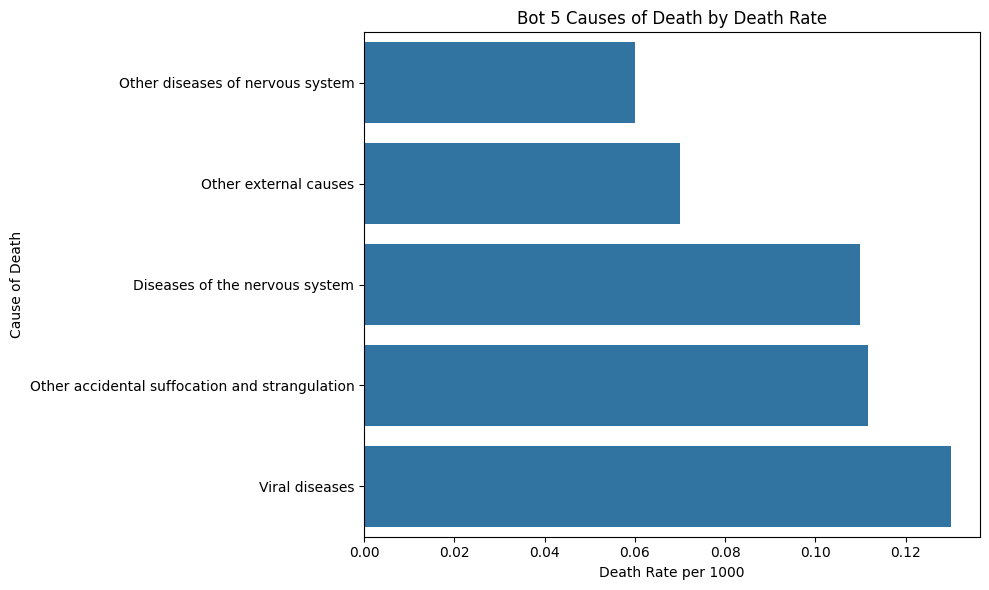

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Cause of death', x='Death rate per 1000', data=bot_5_causes)
plt.title('Bot 5 Causes of Death by Death Rate')
plt.ylabel('Cause of Death')
plt.xlabel('Death Rate per 1000')
plt.tight_layout()
plt.show()

**5 nguyên nhân có tỉ lệ tử vong thấp nhất là:**

In [ ]:
bot_5_causes['Cause of death'].to_list()

['Other diseases of nervous system',
 'Other external causes',
 'Diseases of the nervous system',
 'Other accidental suffocation and strangulation',
 'Viral diseases']

Những nguyên nhân trên có tỉ lệ khoảng 0,05-0,13 phần nghìn. Những nguyên nhân trên liên quan đến các bệnh thần kinh, các bệnh do virus hay bị tai nạn như ngạt thở. Với các bênh thần kinh hiện nay đã có các mũi tiêm trong thai kỳ nên có thể nhận thấy tỉ lệ này rất thấp. Các vấn đề về ngạt thở hay thắt cổ có tỉ lệ thấp do có thể phát hiện thông qua siêu âm để can thiệp kịp thời hay có các biện pháp cấp cứu sau sinh nếu phát hiện trẻ bị ngạt thở. Tuy có tỉ lệ tử vong thấp nhưng cũng cần đề ra thêm các biện pháp để phòng tránh.

**Đề xuất:**
* Thường xuyên khám sức khỏe thai kỳ
* Thực hiện đầy đủ các mũi tiêm phòn ngừa bệnh
* Nâng cao trình độ các bác sĩ phụ sản nhằm xử lý kịp thời nếu bất trắc xảy ra.

# Câu hỏi: Cân nặng của trẻ sơ sinh có ảnh hưởng gì đến tỉ lệ tử vong không?

Lợi ích của câu hỏi: tìm được mức cân nặng mà có tỉ lệ tử vong cao từ đó có thể tìm được các phương pháp chăm sóc đặc biệt

Trả lời câu hỏi bằng cách:
* Tìm tỉ lệ tử vong ở các khoảng cân nặng
* Vẽ biểu đồ thể hiện

In [ ]:
groupby_data_weight_deathrate = data.groupby('Birth weight')['Death rate per 1000'].mean()
groupby_data_weight_deathrate = groupby_data_cause_deathrate.reset_index()
groupby_data_weight_deathrate = groupby_data_weight_deathrate.sort_values(by='Death rate per 1000', ascending=False)
groupby_data_weight_deathrate

,index,Birth weight,Death rate per 1000
2,2,200 - 499,142.661837
8,8,500 - 999,29.248391
0,0,1000 - 1499,7.557124
1,1,1500 - 1999,3.723311
3,3,2000 - 2499,1.504836
7,7,4000 - 4499,0.818714
4,4,2500 - 2999,0.630794
6,6,3500 - 3999,0.452319
5,5,3000 - 3499,0.384780


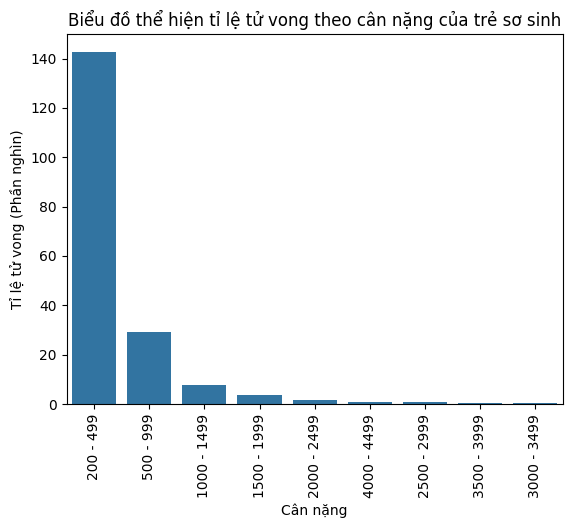

In [ ]:
sns.barplot(
    x=groupby_data_weight_deathrate['Birth weight'],
    y=groupby_data_weight_deathrate['Death rate per 1000']
)

#Cài đặt tiêu đề và nhãn
plt.title('Biểu đồ thể hiện tỉ lệ tử vong theo cân nặng của trẻ sơ sinh')
plt.ylabel('Tỉ lệ tử vong (Phần nghìn)')
plt.xlabel('Cân nặng')
plt.xticks(rotation=90)

#Thêm giá trị lên từng điểm dữ liệu
#for x, y in zip(groupby_data_weight_deathrate['Birth weight'], groupby_data_cause_deathrate['Death rate per 1000']):
#    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

#Hiển thị biểu đồ
plt.show()

**200-499 (g)**: Tỉ lệ tử vong cao, lên đến 142,66 phần nghìn. Với các trường hợp trẻ sinh non có khối lượng như trên chủ yếu là do sinh non hoặc không đủ dinh dưỡng phát trển tronng thai kỳ nên khả năng sống khi sinh ra thấp. \\
**500-999 (g)**: Tỉ lệ tử vong của mức cân nặng này là 29,25 phần nghìn. Trường hợp này cũng là sinh non hoặc thiếu dinh dưỡng nhưng tỉ lệ tử vong giảm rất nhiều so với mức cân nặng 200-499g. \\
**3000-3499 (g)**: Tỉ lệ tử vong thấp nhất chỉ ở khoản 0,38 phần nghìn. Đây là được xem là mức cân nặng tối ưu của một trẻ sơ sinh. Theo như bảng tiêu chuẩn của bộ y tế thì một trẻ sơ sinh đủ tháng sẽ có cân nặng 2900-3800 (g).

**Kết luận:** Ở mức cân nặng từ 2500g trở lên tỉ lệ tử vong đều thấp hơn 1 phần nghìn có thể thấy được tầm quan trong của dinh dưỡng cho thai nhi trong thai kỳ. Khi quan sát sơ qua biểu đồ ta sẽ đoán tỉ lệ tử vong sẽ tỉ lệ nghịch với cân nặng trẻ sơ sinh nhưng khi quan sát kĩ sẽ có hai trường hợp ngoại lệ là 4000-4999g và 3500-3999g. Đây có thể là khi trẻ quá lớn sẽ gây khó khăn trong quá trình sinh sản.

**Đề xuất:**
* Có chế độ dinh dưỡng phù hợp trong thời gian thai kỳ
* Có chế độ chăm sóc đặc biệt với các trường hợp cân nặng không đủ tiêu chuẩn

# Số ca tử vong theo số ngày sống được của trẻ và phân bố theo nguyên nhân tử vong như thế nào?

Lợi ích của việc trả lời câu hỏi: xác định được nguyên nhân tử vong theo từng ngày từ đó có được phương pháp điều trị hợp lý.

Trả lời câu hỏi bằng cách:

*   Tìm top 5 nguyên nhân có số lượng tử vong và tỉ lệ tử vong cao nhất theo từng khoảng sống của trẻ sơ sinh
*   Vẽ biểu dồ thể hiện



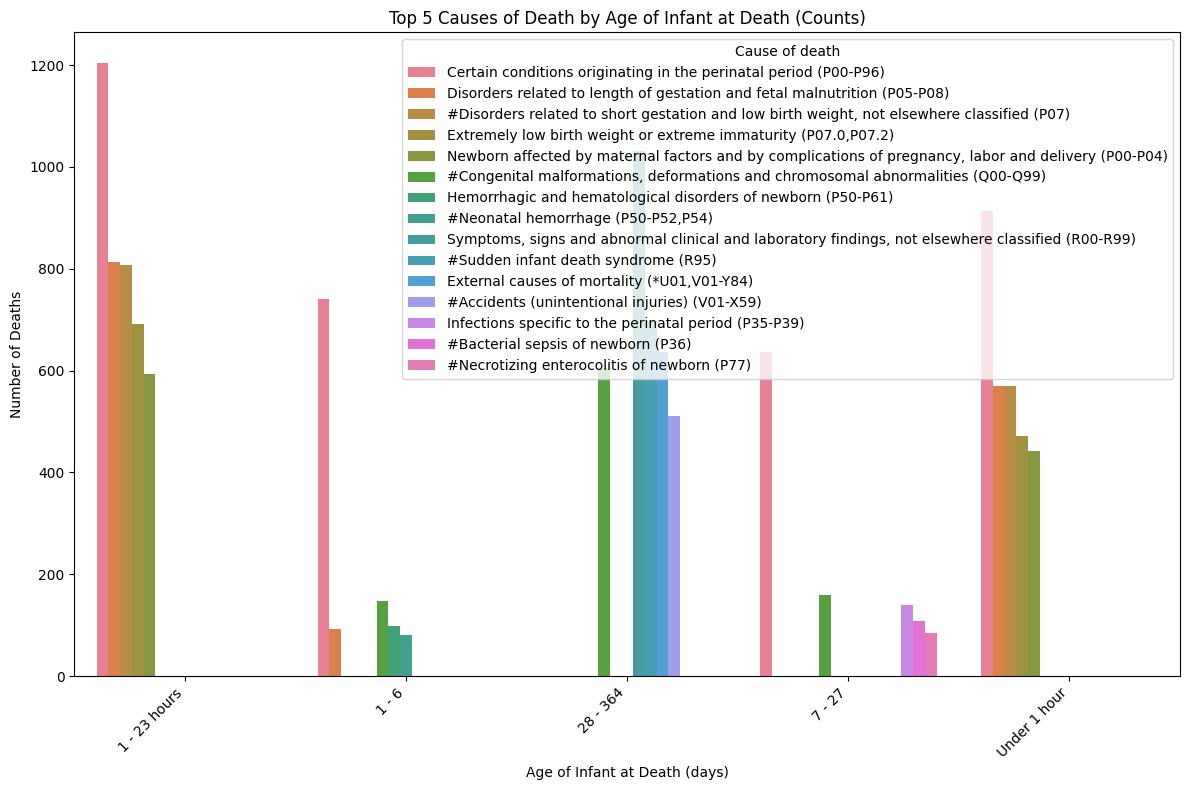

In [ ]:
cause_counts_by_days = data.groupby(['Age of infant at death', 'Cause of death'])['Cause of death'].count().reset_index(name='counts')
cause_counts_by_days = cause_counts_by_days.sort_values(by=['Age of infant at death', 'counts'], ascending=[True, False])
top_5_causes_per_day = cause_counts_by_days.groupby('Age of infant at death').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x='Age of infant at death', y='counts', hue='Cause of death', data=top_5_causes_per_day)
plt.title('Top 5 Causes of Death by Age of Infant at Death (Counts)')
plt.xlabel('Age of Infant at Death (days)')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Với các trẻ có thời gian sống bé hơn 1 tiếng và từ 1-23 tiếng thì các nguyên nhân có số ca tử vong hàng đầu tương tự nhau đều là liên quan đến bệnh trong thai kỳ, thiếu tháng, thiếu cân nặng và nguyên nhân lớn nhất là các bệnh bắt nguồn trong thai kỳ. \\
Đối với thời gian 1-6 ngày và 7-17 ngày nguyên nhân có số ca tử vong cao nhất là các bệnh bắt nguồn trong thai kỳ. Bên cạnh đó nguyên nhân lớn thứ hai là các dị tật bẩm sinh. Tiếp theo là các nguyên nhân do nhiễm trùng, xuất huyết. \\
Đối với thời gian 28-364 ngày, nguyên nhân lớn nhất là trẻ bị xuất huyết, tiếp theo là dị tật bẩm sinh. Các nguyên nhân chủ yếu đối với khoảng thời gian này liên quan đến bệnh hoặc tai nạn sau sinh.

**Đề xuất**


*   Nguyên nhân lớn nhất gây tử vong ở trẻ trong khoảng 1 năm là bệnh trong thai kỳ, thiếu tháng, thiếu cân nặng. Việc cần ưu tiên để giảm thiểu là đưa ra chế độ dinh dưỡng hợp lý cho thai phụ, thường xuyên tham khám để phát hiện bệnh từ sớm
*   Nếu như trẻ không có các biểu hiện của thiếu cân thiếu tháng thì nguyên nhân nữa là bệnh sau sinh, xuất huyết. Đây là điều có thể tránh nếu như có kế hoạch chăm sóc trẻ và tiêm ngừa.



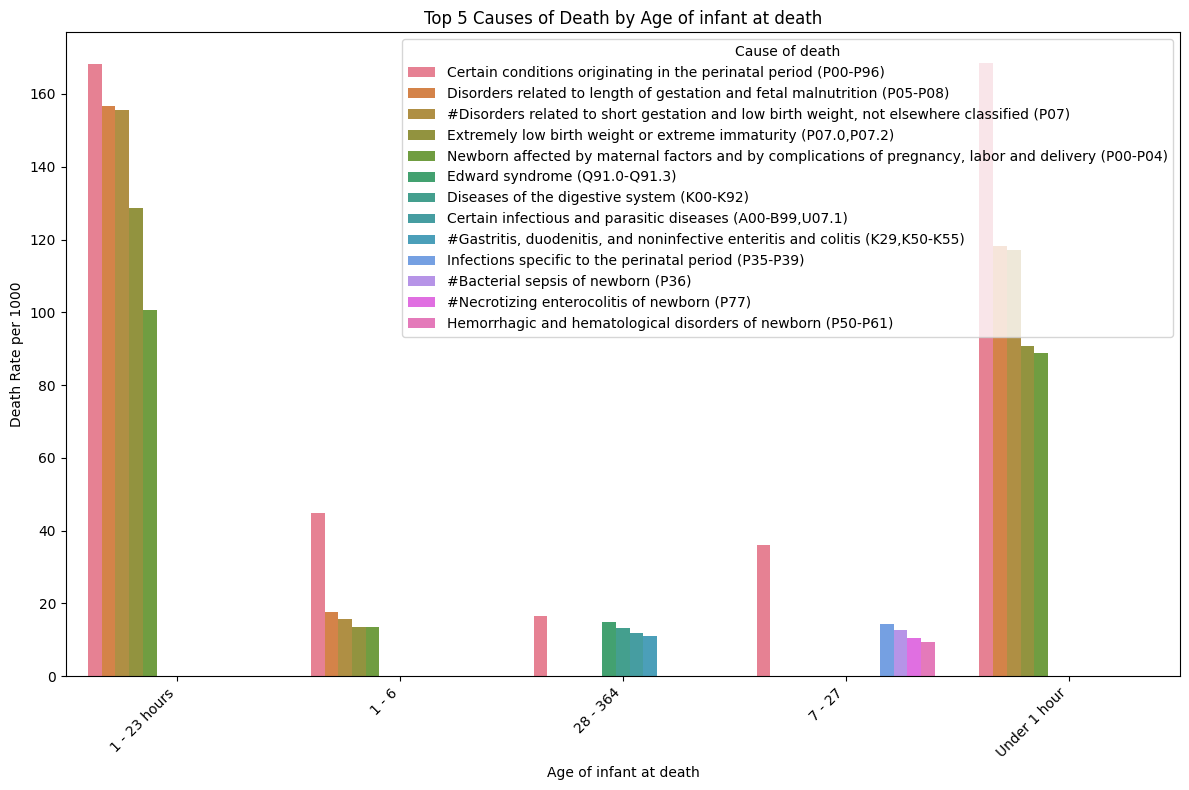

In [ ]:
death_rate_by_days_and_cause = data.groupby(['Age of infant at death', 'Cause of death'])['Death rate per 1000'].mean().reset_index()
death_rate_by_days_and_cause = death_rate_by_days_and_cause.sort_values(by=['Age of infant at death', 'Death rate per 1000'], ascending=[True, False])
top_5_causes_per_day = death_rate_by_days_and_cause.groupby('Age of infant at death').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x='Age of infant at death', y='Death rate per 1000', hue='Cause of death', data=top_5_causes_per_day)
plt.title('Top 5 Causes of Death by Age of infant at death')
plt.xlabel('Age of infant at death')
plt.ylabel('Death Rate per 1000')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Các bệnh bắt nguồn trong thai kỳ, thiếu cân thiếu tháng chính là nguyên nhân có tỉ lệ tử vong hàng đầu trong khoảng tử dưới 1 tiếng đến 1-6 ngày. \\
Bệnh bắt nguồn trong thai kỳ cũng là nguyên nhân có tỉ lệ tử vong cao nhất của các khoảng 7-17 ngày và 28-364 ngày. Các nguyên nhân còn lại là các bệnh, hội chứng, nhiễm trùng, xuất huyết. \\